In [2]:
from google.colab import files
uploaded = files.upload()

Saving Вопросы карьеры.csv to Вопросы карьеры.csv
Saving Вредные привычки, зависимость.csv to Вредные привычки, зависимость.csv
Saving Горе, потери.csv to Горе, потери.csv
Saving Депрессия.csv to Депрессия.csv
Saving Нервные расстройства.csv to Нервные расстройства.csv
Saving О достижении цели.csv to О достижении цели.csv
Saving Отношения с окружающими.csv to Отношения с окружающими.csv
Saving Поиск решения.csv to Поиск решения.csv
Saving Проблемы с детьми.csv to Проблемы с детьми.csv
Saving Проблемы с партнером.csv to Проблемы с партнером.csv
Saving Размышления о мире.csv to Размышления о мире.csv
Saving Самопознание, саморазвитие.csv to Самопознание, саморазвитие.csv
Saving Семейные проблемы.csv to Семейные проблемы.csv


In [3]:
!ls

 sample_data			     'Отношения с окружающими.csv'
'Вопросы карьеры.csv'		     'Поиск решения.csv'
'Вредные привычки, зависимость.csv'  'Проблемы с детьми.csv'
'Горе, потери.csv'		     'Проблемы с партнером.csv'
 Депрессия.csv			     'Размышления о мире.csv'
'Нервные расстройства.csv'	     'Самопознание, саморазвитие.csv'
'О достижении цели.csv'		     'Семейные проблемы.csv'


Let's create 2 files: training and test data

test data - 20%

In [4]:
from sklearn.model_selection import train_test_split
import os
import glob

In [5]:
extension = 'csv'
file_names = [i for i in glob.glob('*.{}'.format(extension))]
file_names_size = len(file_names);

Let's mark the data: add a column in which the value will mean the category number

In [6]:
import pandas as pd
import numpy as np

In [7]:
data_train = []
data_test = []

i = 0
while i<file_names_size:
  df = pd.read_csv(file_names[i], header=0)
  df['THEME'] = i
  train, test = train_test_split(df, test_size=0.2)
  data_train.append(train)
  data_test.append(test)
  i = i + 1

In [8]:
data_test[7][:3]

,Unnamed: 0,USER_ID,USER_NICKNAME,TITLE,MESSAGE,DATE_TIME,TOPIC_LIKES_COUNT,URL,THEME
3,3,u466489,LarisaVb,"Невроз, ОКР","Здравствуйте. Спасибо, что согласились помочь....",2020-04-24 10:11,2,https://www.b17.ru/forum/topic.php?id=311985,7
1012,1012,u391596,Fand,рпп и с чем его едят,доброго времени суток. Появился такой вопрос: ...,2019-09-01 21:28,1,https://www.b17.ru/forum/topic.php?id=178646,7
128,128,u284260,Татьяна255,"много неприятностей, как поддержать себя?",Одновременно у меня из жизни пропало очень мно...,2020-05-02 12:25,1,https://www.b17.ru/forum/topic.php?id=313086,7


In [9]:
data_train[2][:3]

,Unnamed: 0,USER_ID,USER_NICKNAME,TITLE,MESSAGE,DATE_TIME,TOPIC_LIKES_COUNT,URL,THEME
531,531,u412391,heleonnorr,"Жить долго, но скучно? Или...?","Сдавала анализы, стояла в очереди и слушала ра...",2019-04-15 06:34,8,https://www.b17.ru/forum/topic.php?id=160131,2
969,969,u338786,Инна130,Навязчивые секс-сцены с родителями,"Уважаемые психологи,здравствуйте!У меня пробле...",2018-06-17 18:14,1,https://www.b17.ru/forum/topic.php?id=120356,2
344,344,u384654,A_N,Компульсивные передания и РПП яма,Я никогда не страдала от излишнего веса. При ф...,2019-08-31 13:52,2,https://www.b17.ru/forum/topic.php?id=178452,2


combining the data into a single file

-train

In [10]:
final_data_train = pd.concat(data_train)
final_data_train.to_csv( 'train.csv', index=False, encoding='utf-8-sig')
!wc -l train.csv

10546 train.csv


-test

In [11]:
final_data_test = pd.concat(data_test)
final_data_test.to_csv( "test.csv", index=False, encoding='utf-8-sig')
!wc -l test.csv

2641 test.csv


In [12]:
train = pd.read_csv('train.csv', header=0)
train[:3]

,Unnamed: 0,USER_ID,USER_NICKNAME,TITLE,MESSAGE,DATE_TIME,TOPIC_LIKES_COUNT,URL,THEME
0,602,u307258,Пятно,Унижающаяся,Добрый день. У меня в течение года изредка был...,2018-07-06 12:58,4,https://www.b17.ru/forum/topic.php?id=122522,0
1,691,u311725,Юлия фдк,умер ребенок,У меня умерла дочка. Ей было 5 лет. Не дожила ...,2018-04-04 09:46,10,https://www.b17.ru/forum/topic.php?id=112111,0
2,369,u93340,Аннанас,председатель тсж хитрит,"Создаю такую тему здесь, потому что хочу понят...",2019-04-07 15:29,1,https://www.b17.ru/forum/topic.php?id=159131,0


In [13]:
test = pd.read_csv('test.csv', header=0)
test[:3]

,Unnamed: 0,USER_ID,USER_NICKNAME,TITLE,MESSAGE,DATE_TIME,TOPIC_LIKES_COUNT,URL,THEME
0,572,u156453,Вендла,Напала сильная тоска по любимой кошке,"Три месяца назад умерла кошка, которая прожила...",2018-08-17 21:10,24,https://www.b17.ru/forum/topic.php?id=127725,0
1,288,u440205,Herby,Когда больно-одиноко,"Был близкий человек. К сожалению, ""хорошее"" от...",2019-07-20 17:27,1,https://www.b17.ru/forum/topic.php?id=172729,0
2,879,u91294,Фламинга,Выйти в окно,Ничего хорошего нет и не будет.,2017-09-16 17:18,0,https://www.b17.ru/forum/topic.php?id=88241,0


In [14]:
from tensorflow.keras import utils

Protection against unexpected strings such as 'nan'

In [15]:
trb_nan_idx = train[pd.isnull(train['MESSAGE'])].index.tolist()
train.loc[trb_nan_idx, 'MESSAGE'] = ' '
train.loc[trb_nan_idx, 'MESSAGE'] = ' '

In [16]:
x_train = train['MESSAGE']
y_train = utils.to_categorical(train['THEME'],file_names_size)

In [17]:
import nltk
import re
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("russian")
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

get a word form for each token (stemming)

In [18]:
def token_and_stem(text):
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    for token in tokens:
        if re.search('[а-яА-Я]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    print(type(stems))
    return stems

In [ ]:
upd_x_train = []

for i in x_train:
  upd_train = token_and_stem(i)
  upd_x_train.append(upd_train)

exclude the most popular words that do not carry a semantic load (stop words)

In [20]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('russian')
#можно расширить список стоп-слов
stopwords.extend(['что', 'это', 'так', 'вот', 'быть', 'как', 'в', 'к', 'на'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [21]:
len(upd_x_train)


10532

In [22]:
tokens = []
train = []

for x_tr in upd_x_train:
  for token in x_tr:
    if token not in stopwords:
      tokens.append(token)
  train.append(tokens)
  tokens = []

In [23]:
x_train

0        Добрый день. У меня в течение года изредка был...
1        У меня умерла дочка. Ей было 5 лет. Не дожила ...
2        Создаю такую тему здесь, потому что хочу понят...
3        Кто знает есть ли в Беларуси службы, учреждени...
4        Язычество представляется более крутым, вдохнов...
                               ...                        
10527    Добрый день подскажите в моей ситуации. В обще...
10528    Здравствуйте, я сталкивалась в жизни с нарцисс...
10529    Здравствуйте! Опишу для начала ситуацию. Спаси...
10530    После различных ситуаций может возникнуть непр...
10531    Добрый день!Хотела бы услышать мнения по повод...
Name: MESSAGE, Length: 10532, dtype: object

In [24]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences

creating tokenizers for each of the data sets (processed and source)

In [25]:
num_words = 5000
tokenizer = Tokenizer(num_words=num_words, filters='0123456789!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=' ')
upd_tokenizer = Tokenizer(num_words=num_words, filters='0123456789!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=' ')

In [26]:
tokenizer.fit_on_texts(x_train)
upd_tokenizer.fit_on_texts(train)

In [ ]:
tokenizer.word_index

In [ ]:
upd_tokenizer.word_index

In [29]:
sequences = tokenizer.texts_to_sequences(x_train)
upd_sequences = upd_tokenizer.texts_to_sequences(train)

In [30]:
print(x_train[0])
print(sequences[0])
print(train[0])
print(upd_sequences[0])

Добрый день. У меня в течение года изредка была сексуальная связь с бывшим психотерапевтом. Сказать, что я была влюблена по уши, это ничего не сказать. Вчера он сказал мне, что у меня ни грамма ни ума, ни достоинства и я для него не более чем пустое место и  просто дырка. Сказать, что я убита, это ничего не сказать. Я ненавижу себя, рыдаю без остановки и не хочу жить. Помогите мне, пожалуйста, забыть его и найти силы жить дальше. Я долгое время носила его образ в сердце.
[135, 54, 14, 11, 4, 1056, 73, 3033, 60, 980, 6, 2427, 2624, 201, 5, 3, 60, 3172, 20, 2831, 13, 62, 2, 201, 501, 16, 196, 12, 5, 14, 11, 80, 80, 868, 80, 1, 3, 43, 78, 2, 152, 75, 502, 1, 39, 201, 5, 3, 13, 62, 2, 201, 3, 799, 25, 92, 4976, 1, 2, 40, 97, 255, 12, 249, 1005, 26, 1, 198, 552, 97, 215, 3, 1197, 46, 26, 1112, 4, 802]
['добр', 'ден', 'мен', 'течен', 'год', 'изредк', 'сексуальн', 'связ', 'бывш', 'психотерапевт', 'сказа', 'влюбл', 'уш', 'эт', 'нич', 'сказа', 'вчер', 'сказа', 'мен', 'грамм', 'ум', 'достоинств'

In [31]:
max_text_len = 100
x_train = pad_sequences(sequences, maxlen=max_text_len)
upd_x_train = pad_sequences(upd_sequences, maxlen=max_text_len)

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, MaxPooling1D, Conv1D, GlobalMaxPooling1D, Dropout, LSTM, GRU

In [33]:
model_cnn = Sequential()
model_cnn.add(Embedding(num_words, 32, input_length=max_text_len))
model_cnn.add(Conv1D(2*file_names_size**2, 5, padding='valid', activation='relu'))
model_cnn.add(GlobalMaxPooling1D())
model_cnn.add(Dropout(0.2))
model_cnn.add(Dense(file_names_size**2, activation='relu'))
model_cnn.add(Dense(file_names_size, activation='softmax'))

In [34]:
model_cnn.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [35]:
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 32)           160000    
_________________________________________________________________
conv1d (Conv1D)              (None, 96, 338)           54418     
_________________________________________________________________
global_max_pooling1d (Global (None, 338)               0         
_________________________________________________________________
dropout (Dropout)            (None, 338)               0         
_________________________________________________________________
dense (Dense)                (None, 169)               57291     
_________________________________________________________________
dense_1 (Dense)              (None, 13)                2210      
Total params: 273,919
Trainable params: 273,919
Non-trainable params: 0
__________________________________________________

In [36]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [37]:
model_cnn_save_path = 'best_model_cnn.h5'
checkpoint_callback_cnn = ModelCheckpoint(model_cnn_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)
upd_model_cnn_save_path = 'upd_best_model_cnn.h5'
upd_checkpoint_callback_cnn = ModelCheckpoint(upd_model_cnn_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [38]:
upd_history_cnn = model_cnn.fit(upd_x_train, 
                            y_train, 
                            epochs=15,
                            batch_size=256,
                            validation_split=0.2,
                            callbacks=[upd_checkpoint_callback_cnn])

Epoch 1/15
33/33 [==============================] - 9s 245ms/step - loss: 2.4459 - accuracy: 0.0965 - val_loss: 5.3010 - val_accuracy: 0.0000e+00

Epoch 00001: val_accuracy improved from -inf to 0.00000, saving model to upd_best_model_cnn.h5
Epoch 2/15
33/33 [==============================] - 8s 243ms/step - loss: 2.3392 - accuracy: 0.1446 - val_loss: 6.9523 - val_accuracy: 0.0000e+00

Epoch 00002: val_accuracy did not improve from 0.00000
Epoch 3/15
33/33 [==============================] - 8s 242ms/step - loss: 2.1878 - accuracy: 0.2510 - val_loss: 7.6018 - val_accuracy: 0.0000e+00

Epoch 00003: val_accuracy did not improve from 0.00000
Epoch 4/15
33/33 [==============================] - 10s 301ms/step - loss: 1.9430 - accuracy: 0.3379 - val_loss: 9.1376 - val_accuracy: 0.0000e+00

Epoch 00004: val_accuracy did not improve from 0.00000
Epoch 5/15
33/33 [==============================] - 8s 247ms/step - loss: 1.7133 - accuracy: 0.4284 - val_loss: 10.3824 - val_accuracy: 0.0000e+00

Epo

In [39]:
history_cnn = model_cnn.fit(x_train, 
                            y_train, 
                            epochs=15,
                            batch_size=256,
                            validation_split=0.2,
                            callbacks=[checkpoint_callback_cnn])

Epoch 1/15
33/33 [==============================] - 8s 238ms/step - loss: 3.3458 - accuracy: 0.1496 - val_loss: 11.7557 - val_accuracy: 0.0204

Epoch 00001: val_accuracy improved from -inf to 0.02041, saving model to best_model_cnn.h5
Epoch 2/15
33/33 [==============================] - 8s 239ms/step - loss: 1.8748 - accuracy: 0.3568 - val_loss: 10.5278 - val_accuracy: 0.0209

Epoch 00002: val_accuracy improved from 0.02041 to 0.02088, saving model to best_model_cnn.h5
Epoch 3/15
33/33 [==============================] - 8s 236ms/step - loss: 1.5915 - accuracy: 0.4560 - val_loss: 10.5791 - val_accuracy: 0.0389

Epoch 00003: val_accuracy improved from 0.02088 to 0.03892, saving model to best_model_cnn.h5
Epoch 4/15
33/33 [==============================] - 8s 238ms/step - loss: 1.4015 - accuracy: 0.5351 - val_loss: 11.1274 - val_accuracy: 0.0313

Epoch 00004: val_accuracy did not improve from 0.03892
Epoch 5/15
33/33 [==============================] - 8s 237ms/step - loss: 1.2331 - accurac

In [40]:
import matplotlib.pyplot as plt

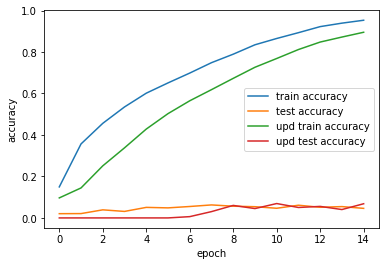

In [41]:
plt.plot(history_cnn.history['accuracy'], 
         label='train accuracy')
plt.plot(history_cnn.history['val_accuracy'], 
         label='test accuracy')
plt.plot(upd_history_cnn.history['accuracy'], 
         label='upd train accuracy')
plt.plot(upd_history_cnn.history['val_accuracy'], 
         label='upd test accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.rcParams["figure.figsize"] = (20,10)
plt.legend()
plt.show()

In [42]:
model_lstm = Sequential()
model_lstm.add(Embedding(num_words, 32, input_length=max_text_len))
model_lstm.add(LSTM(169))
model_lstm.add(Dense(13, activation='softmax'))

In [43]:
model_lstm.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [44]:
model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 32)           160000    
_________________________________________________________________
lstm (LSTM)                  (None, 169)               136552    
_________________________________________________________________
dense_2 (Dense)              (None, 13)                2210      
Total params: 298,762
Trainable params: 298,762
Non-trainable params: 0
_________________________________________________________________


In [45]:
model_lstm_save_path = 'best_model_lstm.h5'
checkpoint_callback_lstm = ModelCheckpoint(model_lstm_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)
upd_model_lstm_save_path = 'upd_best_model_lstm.h5'
upd_checkpoint_callback_lstm = ModelCheckpoint(upd_model_lstm_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [46]:
history_lstm = model_lstm.fit(x_train, 
                              y_train, 
                              epochs=15,
                              batch_size=256,
                              validation_split=0.2,
                              callbacks=[checkpoint_callback_lstm])

Epoch 1/15
33/33 [==============================] - 28s 788ms/step - loss: 2.4434 - accuracy: 0.0923 - val_loss: 5.9982 - val_accuracy: 0.0000e+00

Epoch 00001: val_accuracy improved from -inf to 0.00000, saving model to best_model_lstm.h5
Epoch 2/15
33/33 [==============================] - 26s 800ms/step - loss: 2.3833 - accuracy: 0.0998 - val_loss: 6.1496 - val_accuracy: 0.0000e+00

Epoch 00002: val_accuracy did not improve from 0.00000
Epoch 3/15
33/33 [==============================] - 26s 800ms/step - loss: 2.3603 - accuracy: 0.1364 - val_loss: 5.6331 - val_accuracy: 0.0000e+00

Epoch 00003: val_accuracy did not improve from 0.00000
Epoch 4/15
33/33 [==============================] - 27s 806ms/step - loss: 2.2261 - accuracy: 0.2084 - val_loss: 5.4185 - val_accuracy: 0.0000e+00

Epoch 00004: val_accuracy did not improve from 0.00000
Epoch 5/15
33/33 [==============================] - 26s 796ms/step - loss: 2.0591 - accuracy: 0.2777 - val_loss: 4.8509 - val_accuracy: 0.0000e+00

Epo

In [47]:
upd_history_lstm = model_lstm.fit(upd_x_train, 
                              y_train, 
                              epochs=15,
                              batch_size=256,
                              validation_split=0.2,
                              callbacks=[upd_checkpoint_callback_lstm])

Epoch 1/15
33/33 [==============================] - 27s 826ms/step - loss: 2.7266 - accuracy: 0.1132 - val_loss: 3.4688 - val_accuracy: 0.0000e+00

Epoch 00001: val_accuracy improved from -inf to 0.00000, saving model to upd_best_model_lstm.h5
Epoch 2/15
33/33 [==============================] - 25s 768ms/step - loss: 2.3697 - accuracy: 0.1655 - val_loss: 4.7878 - val_accuracy: 0.0000e+00

Epoch 00002: val_accuracy did not improve from 0.00000
Epoch 3/15
33/33 [==============================] - 26s 800ms/step - loss: 2.2327 - accuracy: 0.2199 - val_loss: 6.1175 - val_accuracy: 9.4922e-04

Epoch 00003: val_accuracy improved from 0.00000 to 0.00095, saving model to upd_best_model_lstm.h5
Epoch 4/15
33/33 [==============================] - 27s 833ms/step - loss: 2.0414 - accuracy: 0.2961 - val_loss: 6.1713 - val_accuracy: 0.0233

Epoch 00004: val_accuracy improved from 0.00095 to 0.02326, saving model to upd_best_model_lstm.h5
Epoch 5/15
33/33 [==============================] - 27s 814ms/s

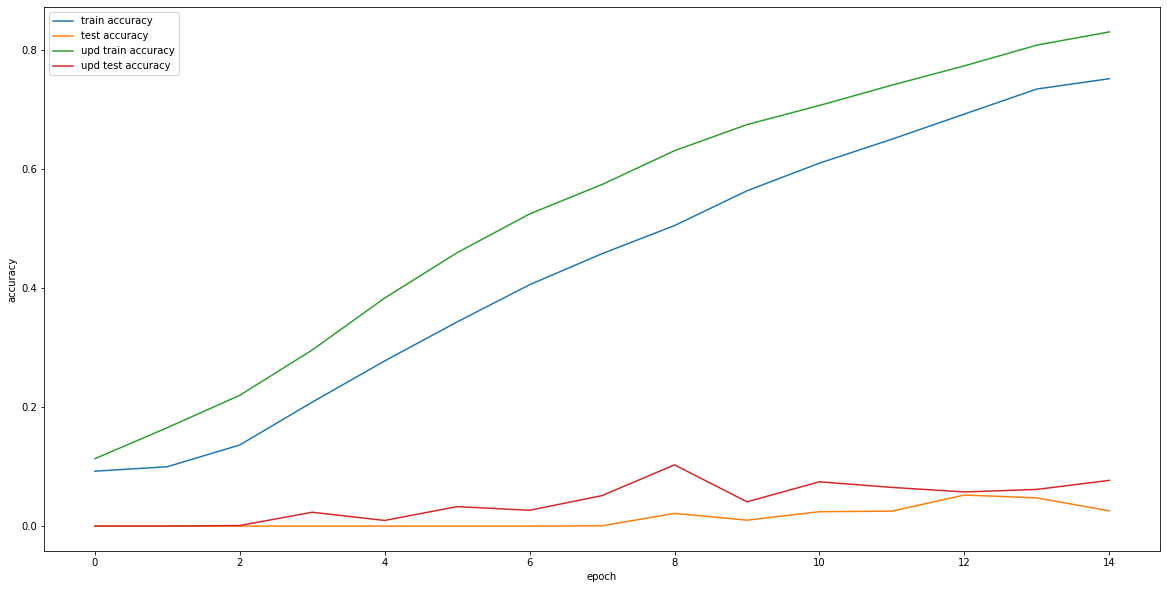

In [48]:
plt.plot(history_lstm.history['accuracy'], 
         label='train accuracy')
plt.plot(history_lstm.history['val_accuracy'], 
         label='test accuracy')
plt.plot(upd_history_lstm.history['accuracy'], 
         label='upd train accuracy')
plt.plot(upd_history_lstm.history['val_accuracy'], 
         label='upd test accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.rcParams["figure.figsize"] = (20,10)
plt.legend()
plt.show()

In [49]:
model_gru = Sequential()
model_gru.add(Embedding(num_words, 32, input_length=max_text_len))
model_gru.add(GRU(169))
model_gru.add(Dense(13, activation='softmax'))

In [50]:
model_gru.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [51]:
model_gru.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 32)           160000    
_________________________________________________________________
gru (GRU)                    (None, 169)               102921    
_________________________________________________________________
dense_3 (Dense)              (None, 13)                2210      
Total params: 265,131
Trainable params: 265,131
Non-trainable params: 0
_________________________________________________________________


In [52]:
model_gru_save_path = 'best_model_gru.h5'
checkpoint_callback_gru = ModelCheckpoint(model_gru_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)
upd_model_gru_save_path = 'upd_best_model_gru.h5'
upd_checkpoint_callback_gru = ModelCheckpoint(upd_model_gru_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [53]:
upd_history_gru = model_gru.fit(upd_x_train, 
                              y_train, 
                              epochs=15,
                              batch_size=256,
                              validation_split=0.2,
                              callbacks=[upd_checkpoint_callback_gru])

Epoch 1/15
33/33 [==============================] - 23s 630ms/step - loss: 2.4560 - accuracy: 0.0966 - val_loss: 5.0068 - val_accuracy: 0.0000e+00

Epoch 00001: val_accuracy improved from -inf to 0.00000, saving model to upd_best_model_gru.h5
Epoch 2/15
33/33 [==============================] - 20s 609ms/step - loss: 2.3721 - accuracy: 0.1187 - val_loss: 5.5858 - val_accuracy: 0.0000e+00

Epoch 00002: val_accuracy did not improve from 0.00000
Epoch 3/15
33/33 [==============================] - 20s 612ms/step - loss: 2.3276 - accuracy: 0.1788 - val_loss: 5.5098 - val_accuracy: 0.0000e+00

Epoch 00003: val_accuracy did not improve from 0.00000
Epoch 4/15
33/33 [==============================] - 20s 619ms/step - loss: 2.1642 - accuracy: 0.2783 - val_loss: 5.5366 - val_accuracy: 0.0000e+00

Epoch 00004: val_accuracy did not improve from 0.00000
Epoch 5/15
33/33 [==============================] - 20s 613ms/step - loss: 1.9561 - accuracy: 0.3520 - val_loss: 6.1036 - val_accuracy: 0.0000e+00



In [54]:
history_gru = model_gru.fit(x_train, 
                              y_train, 
                              epochs=15,
                              batch_size=256,
                              validation_split=0.2,
                              callbacks=[checkpoint_callback_gru])

Epoch 1/15
33/33 [==============================] - 21s 630ms/step - loss: 3.1444 - accuracy: 0.1061 - val_loss: 3.4964 - val_accuracy: 0.0062

Epoch 00001: val_accuracy improved from -inf to 0.00617, saving model to best_model_gru.h5
Epoch 2/15
33/33 [==============================] - 21s 629ms/step - loss: 2.3972 - accuracy: 0.1663 - val_loss: 4.1622 - val_accuracy: 0.0024

Epoch 00002: val_accuracy did not improve from 0.00617
Epoch 3/15
33/33 [==============================] - 21s 626ms/step - loss: 2.2397 - accuracy: 0.2140 - val_loss: 4.7392 - val_accuracy: 0.0024

Epoch 00003: val_accuracy did not improve from 0.00617
Epoch 4/15
33/33 [==============================] - 21s 624ms/step - loss: 2.1252 - accuracy: 0.2584 - val_loss: 5.2560 - val_accuracy: 0.0024

Epoch 00004: val_accuracy did not improve from 0.00617
Epoch 5/15
33/33 [==============================] - 21s 628ms/step - loss: 2.0082 - accuracy: 0.3082 - val_loss: 5.8230 - val_accuracy: 0.0066

Epoch 00005: val_accurac

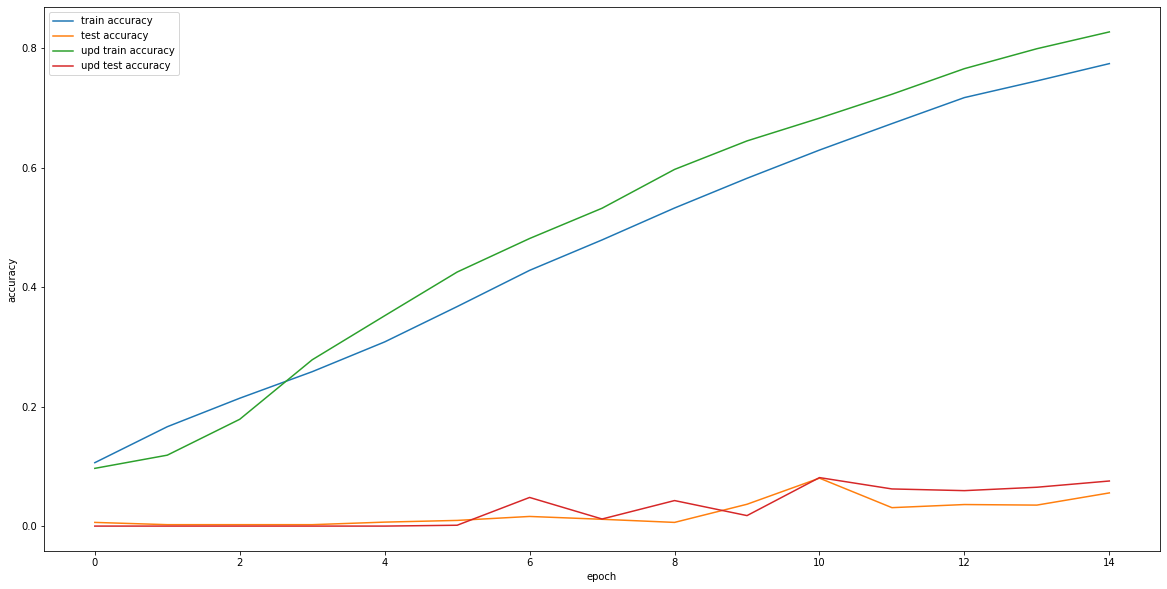

In [55]:
plt.plot(history_gru.history['accuracy'], 
         label='train accuracy')
plt.plot(history_gru.history['val_accuracy'], 
         label='test accuracy')
plt.plot(upd_history_gru.history['accuracy'], 
         label='upd train accuracy')
plt.plot(upd_history_gru.history['val_accuracy'], 
         label='upd test accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.rcParams["figure.figsize"] = (20,10)
plt.legend()
plt.show()

In [56]:
y_test = utils.to_categorical(test['THEME'],file_names_size)

In [57]:
x_test = test['MESSAGE']

In [ ]:
upd_x_test = []

for i in x_test:
  upd_test = token_and_stem(i)
  upd_x_test.append(upd_test)

In [59]:
tokens = []
upd_test = []

for x_tr in upd_x_test:
  for token in x_tr:
    if token not in stopwords:
      tokens.append(token)
  upd_test.append(tokens)
  tokens = []

In [60]:
test_sequences = tokenizer.texts_to_sequences(x_test)
upd_test_sequences = upd_tokenizer.texts_to_sequences(upd_test)

In [61]:
x_test = pad_sequences(test_sequences, maxlen=max_text_len)
upd_x_test = pad_sequences(upd_test_sequences, maxlen=max_text_len)

In [62]:
model_cnn.load_weights(model_cnn_save_path)
model_cnn.evaluate(x_test, y_test, verbose=1)

83/83 [==============================] - 1s 11ms/step - loss: 4.3783 - accuracy: 0.2949


[4.3782572746276855, 0.2949203848838806]

In [63]:
from sklearn.metrics import classification_report

In [64]:
pred = model_cnn.predict(x_test, batch_size = 32)
pred = np.argmax(pred, axis=1)
print(pred[:1000])

[ 2  1  0  0  4  6  6  4  2  0  0  0  0  0  9  8  4  3  8  0  3  0  0  0
  5  0  2  0  6  4  0  0  0  7  7  4  4  0  5  0  8  9  0  0  0  0  3  4
  0  4  4  0  8  0  4  6  0  9  0  2  0  0  0  9  4  0  6  7  1  0  0  8
  3  0  0  4  0  0  9  3  0  0  0  2  0  1  7  8  4  9  7  0  9  3  0  9
  0  2  0  8  9  0  0  9  0  8  9  0  9  0  0  6  0  5  9  0  4  9  4  4
  0  1  0 10  7  2  1  8  0  0  5  9  1  6  4  8  2  4  0  0  0  6  0  9
  8  7  4  6  0  2  7  7  1  6  0  9  7  0  0  8  0  0  3  0  9  0  3  0
  2  2  0  7  9  1  9  0  0  0  0  0  3  8  7  3  4  6  7  2  5  9  4  9
  7  0  8  3  8  4  0  0  2  7  2  4  1  3  1  4  0  9  7  8  2  1  9  4
  1  2  5  5  4  4 10  0  1  9  1  3  1  5  1  1  8  4  3 10  4  1  4  4
  6  1  4  0  1  9  1  1  3  4  3  6  4  4  8  2  9  1  2  4  3  0  1 10
  1  9  2  1  1  3  3  4  5  8  6  2  7  9  0  1  7  5  5  3  1  1  3  5
  0  1  6  4  4  4  0  4  4  9  4  4  2  4  3  4  4  7  8  0  1  1  4  1
  6  1  4  3  7  4  0  8  0 10  2  8  9  8  8  4  1

In [65]:
answer_y_test = np.argmax(y_test, axis=1)
answer_y_test[:1000]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [66]:
print(answer_y_test.shape, pred.shape)
print(answer_y_test[:5], pred[:5])

print(classification_report(answer_y_test, pred))

(2638,) (2638,)
[0 0 0 0 0] [2 1 0 0 4]
              precision    recall  f1-score   support

           0       0.30      0.39      0.34       202
           1       0.22      0.22      0.22       202
           2       0.30      0.37      0.33       202
           3       0.07      0.09      0.08       201
           4       0.30      0.45      0.36       201
           5       0.22      0.27      0.24       204
           6       0.55      0.61      0.58       205
           7       0.41      0.42      0.42       203
           8       0.27      0.36      0.31       203
           9       0.31      0.40      0.35       205
          10       0.38      0.24      0.29       203
          11       0.00      0.00      0.00       203
          12       0.00      0.00      0.00       204

    accuracy                           0.29      2638
   macro avg       0.26      0.29      0.27      2638
weighted avg       0.26      0.29      0.27      2638



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [67]:
model_cnn.load_weights(upd_model_cnn_save_path)
model_cnn.evaluate(upd_x_test, y_test, verbose=1)

83/83 [==============================] - 1s 11ms/step - loss: 4.4881 - accuracy: 0.3654


[4.488144874572754, 0.3654283583164215]

In [68]:
pred = model_cnn.predict(upd_x_test, batch_size = 32)
pred = np.argmax(pred, axis=1)
pred[:1000]

array([ 0,  3,  3,  0,  4,  3,  0,  4,  7,  0,  0,  2,  0,  0,  8,  8,  4,
        4,  8,  0,  0,  8,  0,  0,  0,  0,  2,  0,  5,  0,  0,  0,  4,  0,
        7,  0,  4,  0,  7,  0,  0,  9,  9,  0,  0,  0,  7,  5,  0,  2,  0,
        0,  7,  0,  3,  7,  1,  0,  0,  7,  0,  0,  8,  9,  4,  0,  8,  2,
        1,  1,  6,  8,  0,  0,  0,  0,  0,  2,  8,  3,  0,  0,  0,  0,  0,
        1,  5,  0,  1,  7,  7,  0,  7,  3,  0,  0,  0,  0,  0,  8,  0,  2,
        0,  4,  0,  8,  3,  0,  2,  0,  4,  0,  0,  1,  2,  9,  5,  8,  6,
        0,  0,  1,  0,  3,  0,  0,  4,  9,  0,  0,  0,  9,  1,  0,  4,  6,
        8,  4,  4,  0,  0,  9,  0,  0,  0,  5,  1,  0,  0,  2,  7,  7,  7,
        6,  0,  3,  0,  0,  3,  0,  0,  0,  0,  2,  9,  0,  1,  0,  3,  5,
        4,  7,  8,  8,  0,  5,  0,  0,  1,  0,  3,  0,  7,  0,  3,  2,  0,
        7, 10,  8,  4,  9,  5,  0,  3,  3,  8,  5,  0,  0,  7,  7,  3,  8,
        1,  1, 10,  9,  1,  2,  7,  8,  8,  1,  9,  1,  9,  2,  5,  7,  7,
        4,  1,  3,  1,  4

In [69]:
print(answer_y_test.shape, pred.shape)
print(answer_y_test[:10], pred[:10])

print(classification_report(answer_y_test, pred))

(2638,) (2638,)
[0 0 0 0 0 0 0 0 0 0] [0 3 3 0 4 3 0 4 7 0]
              precision    recall  f1-score   support

           0       0.47      0.46      0.47       202
           1       0.25      0.34      0.29       202
           2       0.45      0.48      0.46       202
           3       0.14      0.16      0.15       201
           4       0.34      0.50      0.40       201
           5       0.26      0.47      0.34       204
           6       0.59      0.69      0.64       205
           7       0.40      0.56      0.47       203
           8       0.34      0.40      0.37       203
           9       0.44      0.41      0.43       205
          10       0.54      0.28      0.37       203
          11       0.00      0.00      0.00       203
          12       0.00      0.00      0.00       204

    accuracy                           0.37      2638
   macro avg       0.33      0.37      0.34      2638
weighted avg       0.33      0.37      0.34      2638



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [70]:
model_lstm.load_weights(model_lstm_save_path)
model_lstm.evaluate(x_test, y_test, verbose=1)

83/83 [==============================] - 5s 62ms/step - loss: 3.0718 - accuracy: 0.2889


[3.0717968940734863, 0.2888551950454712]

In [71]:
pred = model_lstm.predict(x_test, batch_size = 32)
pred = np.argmax(pred, axis=1)
pred[:1000]

array([ 0,  1,  3,  8,  4,  7,  9,  4,  2,  0,  0,  0,  0,  0,  0,  8,  5,
        3,  8,  0,  4,  6,  7,  9,  5,  0,  7,  7,  8,  4,  2,  0,  3,  0,
        2,  7,  3,  0,  0,  0,  0,  0, 10,  0,  0,  6,  9,  4,  0,  4,  0,
        3,  0,  0,  2,  6,  3,  8,  5,  7,  0,  1,  9,  9,  4,  0,  3,  5,
        3,  0,  7,  0,  0,  0,  0,  1,  2,  0,  0,  0,  0,  0,  0,  1,  8,
        7,  3,  4,  7,  5,  3,  2,  7,  9,  0,  9,  0,  0,  0,  8,  8,  7,
        0,  1,  0,  0,  0,  0,  0,  9,  8,  8,  0,  5,  7,  7,  5,  9,  1,
        8,  0,  4,  0,  5,  0,  7,  5,  8,  0,  8,  3,  8,  5,  6,  1,  2,
        6,  3,  5,  3,  0,  8,  0,  0,  0,  3,  1,  0,  0,  1,  7,  2,  2,
        9,  0,  9,  0,  0,  0,  3,  3,  0,  7,  2,  8,  8,  3,  5,  2,  7,
        0,  7,  9,  1,  9,  0,  0,  0,  0,  0,  7,  9,  7,  2,  3,  3,  7,
        8,  4,  9,  7,  0,  5,  0,  1,  3,  0,  5,  5,  8,  2,  0,  8,  9,
        8,  4,  4,  9,  9,  3,  2,  4,  6,  8,  9,  1,  4,  7,  3,  5,  3,
        1,  1,  0,  5,  4

In [72]:
print(answer_y_test.shape, pred.shape)
print(answer_y_test[:10], pred[:10])

print(classification_report(answer_y_test, pred))

(2638,) (2638,)
[0 0 0 0 0 0 0 0 0 0] [0 1 3 8 4 7 9 4 2 0]
              precision    recall  f1-score   support

           0       0.33      0.35      0.34       202
           1       0.20      0.23      0.21       202
           2       0.28      0.29      0.29       202
           3       0.13      0.20      0.16       201
           4       0.30      0.43      0.36       201
           5       0.19      0.32      0.24       204
           6       0.66      0.64      0.65       205
           7       0.36      0.45      0.40       203
           8       0.27      0.32      0.29       203
           9       0.31      0.30      0.30       205
          10       0.34      0.21      0.26       203
          11       0.00      0.00      0.00       203
          12       0.00      0.00      0.00       204

    accuracy                           0.29      2638
   macro avg       0.26      0.29      0.27      2638
weighted avg       0.26      0.29      0.27      2638



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [73]:
model_lstm.load_weights(upd_model_lstm_save_path)
model_lstm.evaluate(upd_x_test, y_test, verbose=1)

83/83 [==============================] - 5s 62ms/step - loss: 2.8961 - accuracy: 0.3249


[2.896077871322632, 0.3248673379421234]

In [74]:
pred = model_lstm.predict(upd_x_test, batch_size = 32)
pred = np.argmax(pred, axis=1)
pred[:1000]

array([ 0,  1,  5,  1,  4,  0,  0,  5,  1,  0,  8,  0,  0,  0,  0,  8,  4,
        0,  9,  0,  5,  8,  2,  9,  8,  0,  2,  0,  8,  4,  0,  0,  0,  0,
        7,  0,  0,  3,  0,  8,  0,  9,  0,  0,  0,  6,  3,  0,  0,  6,  0,
        0,  0,  0,  4,  3,  3,  9,  0,  0,  4,  8,  9,  9,  4,  0,  8,  3,
        1,  8,  7,  0,  0,  0,  0,  3,  9,  2,  9,  8,  0,  0,  0,  0,  0,
        1,  0,  0,  7,  8,  0,  9,  7,  3,  0,  0,  5,  0,  0,  9,  9,  8,
        0,  4,  0,  0,  9,  0,  9,  9,  4,  6,  3,  4,  7,  9,  5,  6,  6,
        8,  0,  1,  0,  7,  0,  7,  0,  9,  0,  9,  3,  9,  1,  0,  3,  6,
        6,  0,  7,  5,  0,  8,  0,  9,  0,  0,  7,  6,  0,  2,  4,  2,  7,
        6,  9,  9,  0,  0, 10,  8,  4,  0,  0,  0,  8,  0,  9,  1,  2,  5,
        1,  9,  9,  9,  0,  4,  0,  0,  8,  0,  0,  0,  7,  7,  3,  3,  8,
        9,  4,  8,  8,  0,  7,  0,  5,  4,  5,  2,  3,  0,  7,  0,  9,  8,
        1,  7,  5,  1,  1,  1,  3,  8,  6,  1,  1,  1,  7,  2,  6,  7,  3,
        4,  1,  3,  3,  1

In [75]:
print(answer_y_test.shape, pred.shape)
print(answer_y_test[:10], pred[:10])

print(classification_report(answer_y_test, pred))

(2638,) (2638,)
[0 0 0 0 0 0 0 0 0 0] [0 1 5 1 4 0 0 5 1 0]
              precision    recall  f1-score   support

           0       0.38      0.40      0.39       202
           1       0.21      0.25      0.23       202
           2       0.39      0.40      0.39       202
           3       0.12      0.20      0.15       201
           4       0.34      0.33      0.33       201
           5       0.26      0.33      0.29       204
           6       0.59      0.67      0.63       205
           7       0.37      0.50      0.42       203
           8       0.29      0.20      0.23       203
           9       0.30      0.48      0.37       205
          10       0.43      0.47      0.45       203
          11       0.00      0.00      0.00       203
          12       0.00      0.00      0.00       204

    accuracy                           0.32      2638
   macro avg       0.28      0.32      0.30      2638
weighted avg       0.28      0.32      0.30      2638



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [76]:
model_gru.load_weights(model_gru_save_path)
model_gru.evaluate(x_test, y_test, verbose=1)

83/83 [==============================] - 3s 35ms/step - loss: 3.5156 - accuracy: 0.2252


[3.5156054496765137, 0.2251705825328827]

In [77]:
pred = model_gru.predict(x_test, batch_size = 32)
pred = np.argmax(pred, axis=1)
pred[:1000]

array([ 0,  1,  3,  1,  4,  2,  7,  4,  9,  8,  0,  2,  0,  0,  0,  3,  4,
        7,  0,  0,  3,  3,  2,  8,  6,  0,  0,  8,  8, 10,  2,  5,  3,  2,
        5,  7,  4,  8,  0,  0,  2,  0,  7,  0,  0,  6,  2,  4,  8, 10,  0,
        0,  0,  0,  0,  0,  0,  8,  5,  0,  0,  0,  9,  6,  0,  7,  0,  5,
        8,  0,  2,  2,  0,  2,  0,  4, 10,  0,  4,  3,  7,  7,  0,  1,  5,
        2,  7,  0,  7,  4,  5,  6,  5,  2,  0,  9,  4,  0,  0,  2,  8,  7,
        2,  1,  0,  0,  0,  0,  0,  0,  0,  3,  3,  5,  0,  7,  5,  0,  1,
        3, 10,  3,  0,  3,  0,  7,  5,  8,  0,  2, 10,  0,  1,  8,  1,  6,
        6,  7,  7,  5,  0,  6,  7,  0,  7,  0,  2,  8,  0,  1,  7,  8,  7,
        8,  1,  6,  0,  7,  7,  5, 10,  0,  7,  2,  0,  4,  7,  0,  2,  3,
        0,  3,  9,  1,  1,  0,  0,  0,  8,  8,  7,  8,  7,  2,  3,  7,  0,
        0,  4,  9,  7,  0,  1, 10,  8,  0,  0,  8,  0,  2,  7,  0,  7,  1,
        5,  1,  0,  8,  0,  8,  5,  0,  9,  8,  2,  2,  4,  1,  1,  2,  0,
        1,  6,  0,  4,  2

In [78]:
print(answer_y_test.shape, pred.shape)
print(answer_y_test[:10], pred[:10])

print(classification_report(answer_y_test, pred))

(2638,) (2638,)
[0 0 0 0 0 0 0 0 0 0] [0 1 3 1 4 2 7 4 9 8]
              precision    recall  f1-score   support

           0       0.21      0.33      0.26       202
           1       0.18      0.19      0.19       202
           2       0.22      0.21      0.21       202
           3       0.10      0.12      0.11       201
           4       0.28      0.43      0.34       201
           5       0.15      0.15      0.15       204
           6       0.45      0.49      0.47       205
           7       0.18      0.32      0.23       203
           8       0.22      0.22      0.22       203
           9       0.33      0.21      0.26       205
          10       0.26      0.25      0.25       203
          11       0.00      0.00      0.00       203
          12       0.00      0.00      0.00       204

    accuracy                           0.23      2638
   macro avg       0.20      0.23      0.21      2638
weighted avg       0.20      0.23      0.21      2638



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [79]:
model_gru.load_weights(upd_model_gru_save_path)
model_gru.evaluate(upd_x_test, y_test, verbose=1)

83/83 [==============================] - 3s 35ms/step - loss: 3.1501 - accuracy: 0.2767


[3.150101900100708, 0.27672478556632996]

In [80]:
pred = model_gru.predict(upd_x_test, batch_size = 32)
pred = np.argmax(pred, axis=1)
pred[:1000]

array([ 0,  3,  3,  1,  4,  0,  7, 10,  1,  0,  0,  2,  0,  0,  0,  2,  4,
        0,  9,  7,  3,  1,  2,  0,  9,  0,  0,  7,  8,  3,  0,  0,  0,  0,
        7,  2,  3,  4,  0,  0,  6,  7,  7,  0,  0,  6,  8,  0,  0,  1,  0,
        0,  0,  0,  0,  5,  3,  0,  4,  0,  0,  9,  9,  0,  4,  0,  3,  3,
        1,  0,  0,  6,  1,  7,  0,  0,  0,  7,  0,  5,  7,  3,  0,  0,  0,
        5,  7,  0,  7,  8,  3,  7,  6,  3,  2,  9,  7,  0,  0,  9,  9,  2,
        0,  0,  0,  0,  0,  0,  0,  4,  0,  9,  7,  1,  7,  0,  5,  9,  0,
        0,  1,  7,  0,  3,  0,  7,  5,  9,  7,  5,  0,  9,  1,  0,  4,  6,
        9,  0,  7,  5,  0,  8,  0,  0,  0,  0,  7,  0,  0,  5,  7,  7,  7,
        6,  1,  9,  0,  0,  7,  3,  5,  0,  0,  0,  9,  3,  0,  1,  7,  7,
        1,  7,  8,  1,  0,  0,  0,  3,  0,  0,  7,  6,  0,  5,  7,  7,  0,
        2, 10,  8,  8,  0,  3,  7,  3,  0,  8,  8,  7,  6,  0,  0,  1,  1,
        1,  4, 10,  6,  3,  4,  2,  9,  9,  1,  9,  1,  4,  1,  0,  3,  4,
        0,  4,  3,  1,  5

In [81]:
print(answer_y_test.shape, pred.shape)
print(answer_y_test[:10], pred[:10])

print(classification_report(answer_y_test, pred))

(2638,) (2638,)
[0 0 0 0 0 0 0 0 0 0] [ 0  3  3  1  4  0  7 10  1  0]
              precision    recall  f1-score   support

           0       0.24      0.41      0.30       202
           1       0.22      0.23      0.22       202
           2       0.25      0.26      0.25       202
           3       0.13      0.15      0.14       201
           4       0.28      0.36      0.32       201
           5       0.24      0.32      0.28       204
           6       0.52      0.55      0.53       205
           7       0.23      0.45      0.30       203
           8       0.28      0.22      0.24       203
           9       0.33      0.28      0.30       205
          10       0.52      0.37      0.43       203
          11       0.00      0.00      0.00       203
          12       0.00      0.00      0.00       204

    accuracy                           0.28      2638
   macro avg       0.25      0.28      0.26      2638
weighted avg       0.25      0.28      0.26      2638



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


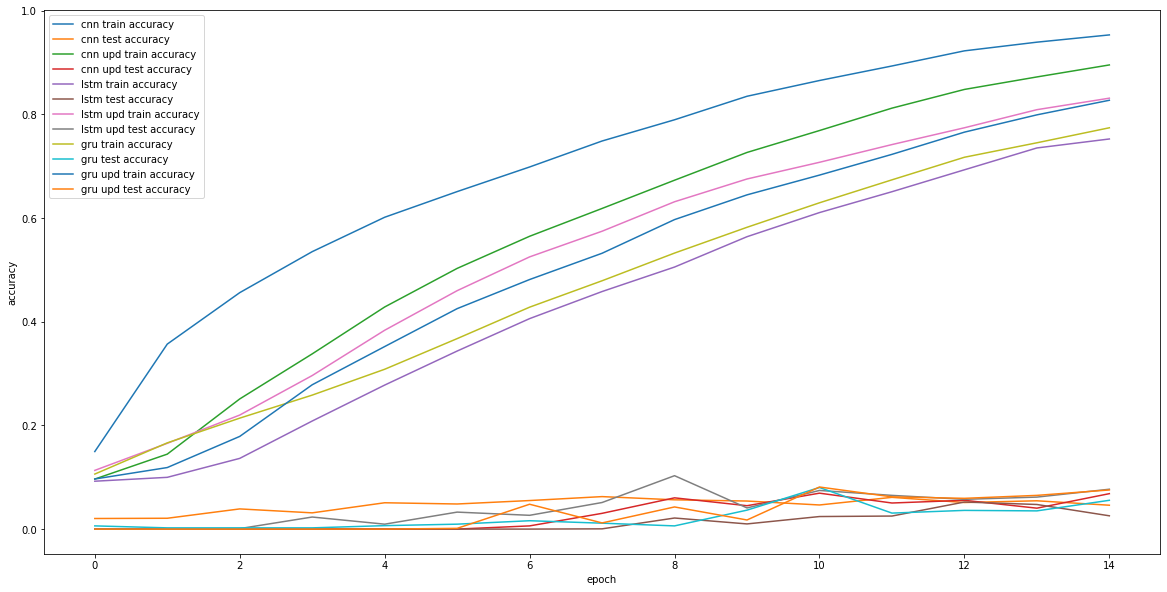

In [82]:
plt.plot(history_cnn.history['accuracy'], 
         label='cnn train accuracy')
plt.plot(history_cnn.history['val_accuracy'], 
         label='cnn test accuracy')
plt.plot(upd_history_cnn.history['accuracy'], 
         label='cnn upd train accuracy')
plt.plot(upd_history_cnn.history['val_accuracy'], 
         label='cnn upd test accuracy')

plt.plot(history_lstm.history['accuracy'], 
         label='lstm train accuracy')
plt.plot(history_lstm.history['val_accuracy'], 
         label='lstm test accuracy')
plt.plot(upd_history_lstm.history['accuracy'], 
         label='lstm upd train accuracy')
plt.plot(upd_history_lstm.history['val_accuracy'], 
         label='lstm upd test accuracy')

plt.plot(history_gru.history['accuracy'], 
         label='gru train accuracy')
plt.plot(history_gru.history['val_accuracy'], 
         label='gru test accuracy')
plt.plot(upd_history_gru.history['accuracy'], 
         label='gru upd train accuracy')
plt.plot(upd_history_gru.history['val_accuracy'], 
         label='gru upd test accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.rcParams["figure.figsize"] = (40,10)
plt.legend()
plt.show()